<a href="https://colab.research.google.com/github/22053604/Cardiovascular-Health-Analysis/blob/main/Cardiovascular_Health_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(Title)

**Overview**

(Explain assignment project...)

The assignment involves analysing a cardiovascular health dataset to uncover insights about the relationships between a person's demographic, lifestyle, and clinical factors and their risk of cardiovascular disease.
(just a rough draft)

**Problem Solving Methodology**




**Problem Statement**

**Input and Output Analysis**

Inputs for Analysis:

Cardiovascular Health dataset as SQLite database

Outputs:

Data Analysis 1:

Exploring patient's ....

a) Analysing the risk of cardiovascular heart disease by

b) Analysing the risk of cardiovascular heart disease by



# Design - Algorithm
1. Create connection to SQLite database

2. Load the 'Cardio Health' table into a Panadas DataFrame

3. Performs data exploration, including display first few rows, checking for duplicates, and handling missing values.

4. Analysis 1. Explore a Demographic and Lifestyle factor: Display using bar & pie charts?

5. Analysis 2. Explore a Demographic and Clinical factor: Display using ___ charts

6. Analysis 1. Explore combination of Demographic, Lifestyle and Clinical factor: Display using ___ charts

7. Closes the database connection





# Final Design - Pseudocode
...

# Step 1: Import the Necessary Libraries


*   **SQL queries** to extract data from dataset

*   **Panadas** for data manipulation and analysis

*   **Numpy** for numerical operations

*   **Matplotlib** for graph and data visualisations

*   **Ipywidgets** for ...





In [11]:
#importing necessary libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets



# Step 2: Connect to the SQLite Database

1.   Connect to the database named 'cardio_health.db'

2.   Load the database

3.   Examine and test structure of database


In [12]:
#Connect to the SQLite database
conn = sqlite3.connect('cardio_health.db')
cursor = conn.cursor()

In [13]:
#Retrieve and display table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

#List all tables
print(cursor.fetchall())


[('medical_examination',)]


*(note: table is 'medical_examination')*

# Step 4: Extract Data Using SQL Queries


In [16]:
query = """
SELECT age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio
FROM medical_examination;
"""

query = "SELECT * FROM medical_examination;"
df = pd.read_sql_query(query, conn)

# Step 5: Clean the Data

1.   Handle missing values
2.   Convert age (days to years)




In [17]:
df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [18]:
df['age_years'] = df['age'] / 365

#Dropping orginal age column in days
#df.drop(columns=[age], inplace=True)

# Step 6: Factors Combination Analysis

1. Demographic and Lifestyle factor

2. Demographic and Clinical factor

3. Demographic, Lifestyle and Clinical factor




In [20]:
#Gender and smoking example
group_data = df.groupby(['gender','smoke'])['cardio'].mean()
print(group_data)


gender  smoke
1       0        0.497103
        1        0.477245
2       0        0.513893
        1        0.474421
3       0        0.363636
Name: cardio, dtype: float64


In [22]:
#Gender and smoking example
group_data = df.groupby(['age','cholesterol'])['cardio'].mean()
print(group_data)


age    cholesterol
10798  1              0.0
10859  1              0.0
10878  1              0.0
10964  1              0.0
14275  3              1.0
                     ... 
23687  3              1.0
23690  2              1.0
23692  2              1.0
23701  1              1.0
23713  1              1.0
Name: cardio, Length: 16882, dtype: float64


# Step 7: Create Data Visualisations and Graphs


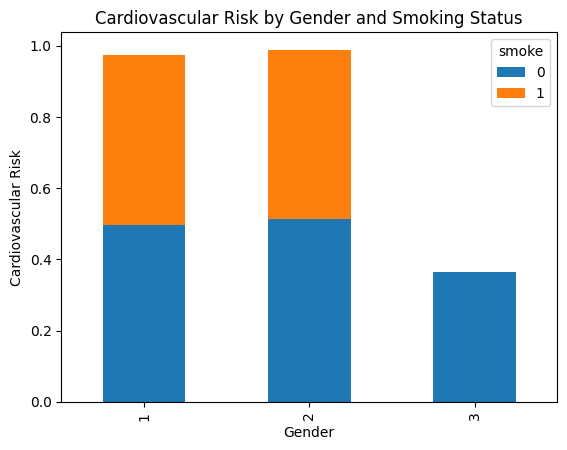

In [26]:
gender_smoke_data = df.groupby(['gender','smoke'])['cardio'].mean().unstack()
gender_smoke_data.plot(kind='bar', stacked=True)
plt.title('Cardiovascular Risk by Gender and Smoking Status')
plt.xlabel('Gender')
plt.ylabel('Cardiovascular Risk')
plt.show()